In [1]:
"""!pip install mlutils
!pip install tqdm
!pip install -U scikit-learn"""

'!pip install mlutils\n!pip install tqdm\n!pip install -U scikit-learn'

In [2]:
import pandas as pd
import numpy as np
import scipy as sp

import mlutils
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

import seaborn as sbn
import matplotlib.pyplot as plt

In [3]:
#https://empresas.blogthinkbig.com/que-algoritmo-elegir-en-ml-aprendizaje/
#https://healthdataminer.com/data-mining/aprendizaje-supervisado-y-no-supervisado/
#http://www.cs.us.es/~fsancho/?e=77

# Boundaries

In [4]:
#With ML we find the boundaries that split our data into several groups, this allow us to determine whether a new element is in one or another group.
#lets creat some random data:
n=(100,2)
np.random.seed(13)

#first group
X1 = np.random.normal(loc=(3,1), scale=0.6, size=n)
n1 = np.zeros(n[0])

#second group
X2 = np.random.normal(loc=(1.2,1), scale=0.6, size=n)
n2 = np.ones(n[0])

#merging
X = np.concatenate((X1, X2))
y = np.concatenate((n1, n2))

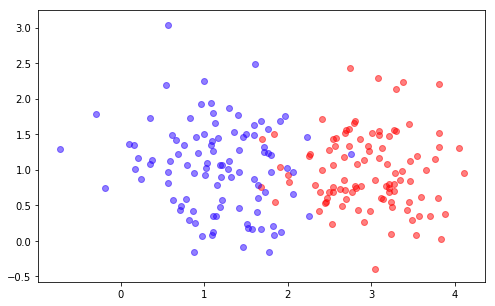

In [5]:
fig = plt.figure(figsize=(8,5))
#plt.plot(X1.T[0], X1.T[1], "ro", alpha=0.3)
#plt.plot(X2.T[0], X2.T[1], "bo", alpha=0.3)
#lets plot with mlutils
mlutils.plot_2Ddata(X=X, y=y)

(0.49515, 0.50485)

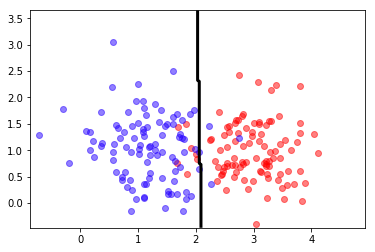

In [6]:
#lets compute the bayesian boundary with LogisticRegression
estimator_lr = LogisticRegression().fit(X=X, y=y)
mlutils.plot_2Ddata_with_boundary(predict=estimator_lr.predict, X=X, y=y)

(0.468875, 0.531125)

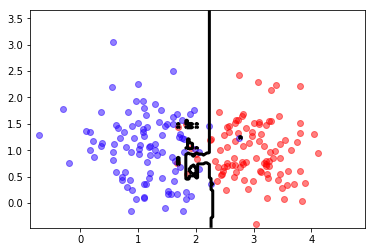

In [7]:
#lets compute the bayesian boundary with RandomForestClassifier
estimator_rfc = RandomForestClassifier().fit(X=X, y=y)
mlutils.plot_2Ddata_with_boundary(predict=estimator_rfc.predict, X=X, y=y)

(0.46525, 0.53475)

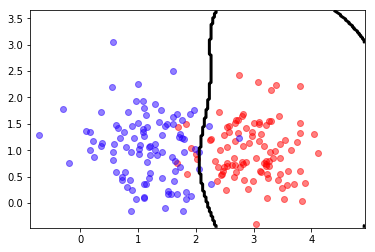

In [8]:
#lets compute the bayesian boundary with SCV
estimator_scv = SVC().fit(X=X, y=y)
mlutils.plot_2Ddata_with_boundary(predict=estimator_scv.predict, X=X, y=y)

# sklearn

1. Before starting to work with our model we need to understand the data
        a. Clean the dataset
        b. EDA (statisitics, corr, ANOVA...)

2. After cleaning we start to build the model
        a. which variable is the target? which one/s are the features? 
        b. training and testing sets (train_test_split). In this step we get the X_train, X_test, y_train, y_test where the X are the features of 
           the model and y is the target. 
        c. build the regression/classification for the numerical/categorical target according to the kind of relations that we see between
           the target and the feactures.
        d. After this we make the training by using the fit(X=feactures, y=target) method of the regression/classification. 
        e. Now we can use the predict() method to test our model
     
3. Now that the model is ready we analyze their metrics:
        - R2
        - MAE
        - MSE
        - RMSE

## Cleaning with SimpleImputer 

An alternative to df.fillna() is to use sklearn.impute.SimpleImputer, with this one we can fill the nan values with several strategies:

    1. First we initialize the imputer chosing the strategy to apply. 
    2. Then we can apply the fit() method, this one computes the fitted parameters (according to the chosen strategy).
    2. Some estimators (like the SimpleImputer) have a transform() method that allow us to transform the data. By using the transform() 
       method we can apply the changes to the df.

We can apply both; fit() and transform() at the same time by using fit_transform().

There are other estimators that also have the methods predict() and score(), they allow us to make predictions with our model and see a score to know how good is the model.

In [9]:
dic = {"A":[2, 3, 12, None, 8, 4, 8], "B":["Hi", "yo", np.nan, "hey", np.nan, "bye", "yo"]}
df = pd.DataFrame(dic)
df

,A,B
0,2.0,Hi
1,3.0,yo
2,12.0,NaN
3,NaN,hey
4,8.0,NaN
5,4.0,bye
6,8.0,yo


In [10]:
df.isnull().sum()

A    1
B    2
dtype: int64

In [11]:
#lets fill the nan values by using a SimpleImputer object
estimator = SimpleImputer(strategy="most_frequent")                      #fills with the mode
estimator.fit(df)                                                        #computes the mode for each column of the df
df_clean = pd.DataFrame(estimator.transform(df), columns=df.columns)     #we turn into a df the transformed object.
df_clean

,A,B
0,2,Hi
1,3,yo
2,12,yo
3,8,hey
4,8,yo
5,4,bye
6,8,yo


In [12]:
#or in one line
df_clean2 = pd.DataFrame(SimpleImputer(strategy="most_frequent").fit_transform(df), columns=df.columns)
df_clean2

,A,B
0,2,Hi
1,3,yo
2,12,yo
3,8,hey
4,8,yo
5,4,bye
6,8,yo


# Linear regression example

After cleaning the dataset we can perform a train_test_split (or other method) to split our data into training and testing sets.

When we have a dataset with few rows it is better to use a stratified builder for the training and testing datasets, for instance we can use StratifiedShuffleSplit from sklearn.model_selection

### Cleaning the dataset

In [13]:
#we are gonna work with this dataset
df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')
df.columns = df.columns.str.replace("-", "_")
df.head()

,symboling,normalized_losses,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,horsepower_binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [14]:
#and lets do a (non-exhaustive) cleaning process
df.dropna(axis=0, inplace=True)
df.isna().sum()

symboling            0
normalized_losses    0
make                 0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
city_L/100km         0
horsepower_binned    0
diesel               0
gas                  0
dtype: int64

In [15]:
#lets see some correlations for the numerical data (this is not an EDA but...)
df.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,city_L/100km,diesel,gas
symboling,1.000000,0.453423,-0.533112,-0.359883,-0.242821,-0.539407,-0.226121,-0.055329,-0.142125,-0.013520,-0.180275,0.090778,0.229436,0.004688,0.073359,-0.076420,0.021612,-0.192544,0.192544
normalized_losses,0.453423,1.000000,-0.046971,0.027234,0.090056,-0.362499,0.107034,0.147862,-0.030152,0.056054,-0.112288,0.226654,0.215903,-0.208695,-0.166772,0.138183,0.223308,-0.096487,0.096487
wheel_base,-0.533112,-0.046971,1.000000,0.876945,0.821427,0.607417,0.790205,0.592517,0.493941,0.163725,0.248383,0.381984,-0.351925,-0.496565,-0.566948,0.591956,0.517050,0.305889,-0.305889
length,-0.359883,0.027234,0.876945,1.000000,0.857249,0.522367,0.882091,0.698626,0.608496,0.136850,0.156926,0.583073,-0.280397,-0.686142,-0.715124,0.689466,0.690579,0.212484,-0.212484
width,-0.242821,0.090056,0.821427,0.857249,1.000000,0.351127,0.862835,0.739543,0.543859,0.210495,0.188331,0.604099,-0.252116,-0.639692,-0.684550,0.744176,0.685663,0.251112,-0.251112
height,-0.539407,-0.362499,0.607417,0.522367,0.351127,1.000000,0.354085,0.100518,0.199490,-0.084755,0.269773,-0.031489,-0.270020,-0.128523,-0.181670,0.182407,0.111120,0.279063,-0.279063
curb_weight,-0.226121,0.107034,0.790205,0.882091,0.862835,0.354085,1.000000,0.858968,0.646918,0.193575,0.153952,0.750749,-0.281231,-0.766146,-0.808146,0.828483,0.809512,0.228445,-0.228445
engine_size,-0.055329,0.147862,0.592517,0.698626,0.739543,0.100518,0.858968,1.000000,0.601384,0.265626,0.017246,0.825377,-0.227577,-0.712693,-0.734062,0.889265,0.814696,0.076032,-0.076032
bore,-0.142125,-0.030152,0.493941,0.608496,0.543859,0.199490,0.646918,0.601384,1.000000,-0.049606,-0.000044,0.579114,-0.276668,-0.591597,-0.598455,0.544375,0.574286,0.055927,-0.055927
stroke,-0.013520,0.056054,0.163725,0.136850,0.210495,-0.084755,0.193575,0.265626,-0.049606,1.000000,0.191776,0.139409,-0.067852,-0.050971,-0.052345,0.107893,0.065893,0.240193,-0.240193


### Building the model

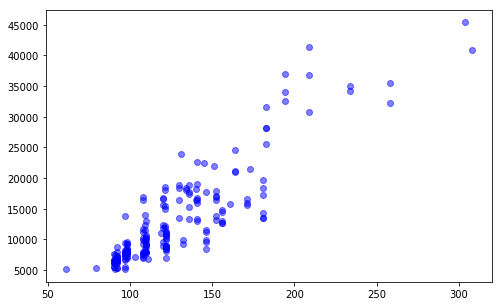

In [16]:
#a. our target (y) is gonna be the price and the eature is the engine-size
y = df.price.values.reshape(-1,1)
X = df["engine_size"].values.reshape(-1,1)

#lets plot to see the kind of relation between X and y
fig = plt.figure(figsize=(8,5))
plt.plot(X, y, "bo", alpha=0.5)

In [17]:
#b. now let's choose the training and testing sets by using the sklearn.model_selection train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=235)

In [18]:
#c. lets use a linear regression
estimator = LinearRegression()

#d training the model with the training data
estimator.fit(X_train, y_train)

LinearRegression()

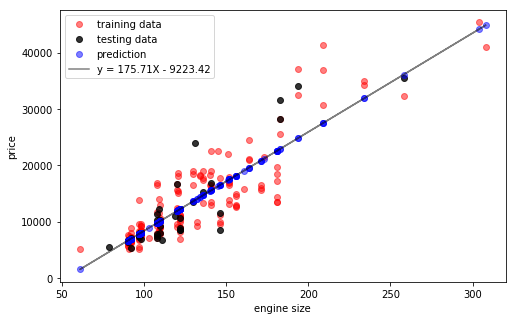

In [19]:
#lets see the prediction
fig = plt.figure(figsize=(8,5))
plt.plot(X_train, y_train, "ro", alpha=0.5, label="training data")
plt.plot(X_test, y_test, "ko", alpha=0.8, label="testing data")
plt.plot(X_train, estimator.predict(X_train), "bo", alpha=0.5, label="prediction")
plt.plot(X_train, estimator.predict(X_train), "k-", alpha=0.5, label="y = %.2fX %s %.2f"%(estimator.coef_, ["-" if np.sign(estimator.intercept_)<0 else "+"][0], abs(estimator.intercept_)) )
plt.xlabel("engine size")
plt.ylabel("price")
plt.legend()

### metrics

In [20]:
#lets see the R2
print("R2_train = ", estimator.score(X=X_train, y=y_train))
print("R2_test  = ", estimator.score(X=X_test, y=y_test))

R2_train =  0.7872767372388441
R2_test  =  0.7953815592243649


In [21]:
#as we can see the score for the training is lower than the score for the testing, this is not a good result, this may mean that the model is not
#good enough to predict the target. 

In [22]:
#let's se the MAE, MSE, RMSE respect to the mean test value
y_predic = estimator.predict(X=X_test)
y_test_mean = y_test.mean()

#the MAE tell us how symetric are the errors respect to a value, it is, if they are gaussian (like the mean)
#the RMSE say as how spread around a symetric axis are the errors distributed (like the standard distribution)
print("MAE  =",  metrics.mean_absolute_error(y_pred=y_predic, y_true=y_test)/y_test_mean)
print("MSE  =",  metrics.mean_squared_error(y_pred=y_predic, y_true=y_test))
print("RMSE =", np.sqrt(metrics.mean_squared_error(y_pred=y_predic, y_true=y_test))/y_test_mean)

MAE  = 0.1891651855530439
MSE  = 12246706.754902933
RMSE = 0.29519314594126783


In [23]:
#this result tell us that the average distance between the points of the test dataset and the prediction is 
#in average 29% of the mean value of the test values. 

# Multiple linear regression

In [24]:
#the cleaning and EDA were done before
#lets make a linear model to predict the price using all the numerical features
X = df.select_dtypes(exclude=object).drop(labels="price", axis=1)
y = df.price
X.shape, y.shape

((196, 18), (196,))

In [25]:
#training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=51)

#linear regression
linear = LinearRegression()

#training
linear.fit(X=X_train, y=y_train)

LinearRegression()

In [26]:
#metricts
print("R2_train =", linear.score(X_train, y_train))
print("R2_test  =", linear.score(X_test, y_test))

#let's se the MAE, MSE, RMSE respect to the mean test value
y_predic = linear.predict(X=X_test)
y_test_mean = y_test.mean()
print("MAE  =",  metrics.mean_absolute_error(y_pred=y_predic, y_true=y_test)/y_test_mean)
print("MSE  =",  metrics.mean_squared_error(y_pred=y_predic, y_true=y_test)/y_test_mean**2)
print("RMSE =", np.sqrt(metrics.mean_squared_error(y_pred=y_predic, y_true=y_test))/y_test_mean)

R2_train = 0.8505324888545887
R2_test  = 0.9222798453885175
MAE  = 0.1451679336600441
MSE  = 0.03556016384100806
RMSE = 0.18857402748259916


In [75]:
#the coefficients of the model are:
for w, col in zip(linear.coef_, X_train.columns):
    print("%s"%col, "=".rjust(X_train.columns.str.len().max()-len(col)+2, " "), " %.2f".rjust(0," ")%w, end="\n")

symboling          =  -14.01
normalized_losses  =  -3.68
wheel_base         =  129.25
length             =  -18112.91
width              =  39461.78
height             =  186.96
curb_weight        =  -0.13
engine_size        =  123.73
bore               =  -672.41
stroke             =  -3308.99
compression_ratio  =  334.84
horsepower         =  35.89
peak_rpm           =  1.96
city_mpg           =  102.45
highway_mpg        =  194.52
city_L/100km       =  1282.77
diesel             =  54.61
gas                =  -54.61


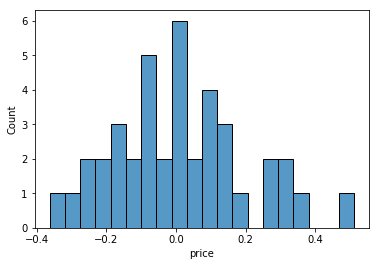

In [76]:
#lets see how the errors are distributed in a histogram
sbn.histplot((y_test-y_predic)/y_test.mean(), bins=20)

In [77]:
#the errors look like gaussian

# Regression with regularization